# 数値解析第９回課題

### 学籍番号：08B22182　氏名：平山聖輝

課題9

分割数2および分割数4に対して，以下の積分を台形則とシンプソン則を用いて計算せよ．

$$
f(x) = \sqrt{2 - x}
$$
$$
F = \int_1^2{f(x)dx}
$$

シンプソン則だと分割数が$2N$になることに注意

In [26]:
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import sympy as sp

### 関数の定義

In [29]:
x = Symbol('x')
f = sp.sqrt(2 - x)
display(f)

sqrt(2 - x)

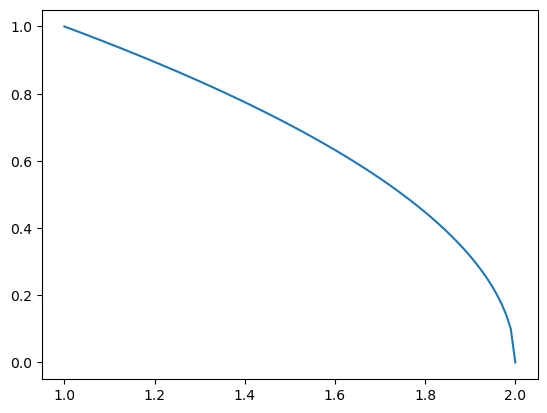

In [41]:
x_g = np.linspace(1, 2, 100) #1～2のfの軌跡を描く
y_g = [f.subs(x, i) for i in x_g]
plt.plot(x_g, y_g)

### 台形則の場合

台形則の更新則は以下のとおりであるから，それぞれの分割数に応じて計算する．

$$
S = \frac{h}{2}(y_0 + y_N + 2\sum_{i=1}^{N-1}{y_i})
$$

In [88]:
def integrateTrapezoid (f, x_min, x_max, N):
    #刻み幅hの定義
    h = (x_max - x_min) / N
    #linspaceは等差数列を生成する関数，1～2で個数がN+1個の数列がx_h
    x_h = np.linspace(x_min, x_max, N+1)
    
    #i=1～N-1までy_iを足す
    sum_y = 0.
    for i in range(1,N):
        sum_y = sum_y + f.subs(x,x_h[i])

    S = h/2 * ( f.subs(x,x_h[0]) + f.subs(x,x_h[-1]) + 2*sum_y)
    
    return S

In [90]:
N1 = 2
N2 = 4
x_min = 1
x_max = 2

In [94]:
Trape2 = integrateTrapezoid(f, x_min, x_max, N1)
Trape4 = integrateTrapezoid(f, x_min, x_max, N2)
#ライブラリを用いて確認する用の変数も作る
integrate_ref = integrate(f, (x, x_min, x_max)).evalf()
print('Trapezoid, (N=2) equals ', Trape2, '\n')
print('Trapezoid, (N=4) equals ', Trape4, '\n')
print('Integrate reference = ', integrate_ref)

Trapezoid, (N=2) equals  0.603553390593274 

Trapezoid, (N=4) equals  0.643283046242747 

Integrate reference =  0.666666666666667


よって台形則により求めた値は以下のようになる．

$ N = 2 $ の場合

$$
S_{T2} = 0.603553390593274
$$

$ N =4 $ の場合

$$
S_{T4} = 0.643283046242747
$$

### シンプソン則の場合

シンプソン則の更新則は以下のようになるから台形則のときと同様に計算していく．

$$
S = \frac{h}{3}\sum_{i=0}^{N-1}{(y_{2i} + y_{2i+2} + 4y_{2i+1})}
$$

ただし，台形則のときとは $ h $ が異なり，

$$
h = \frac{x_{min} - x_{max}}{2N}
$$

となる．

In [112]:
def integrateSimpson(f, x_min, x_max, N):
    h = (x_max - x_min) / (2*N)
    x_h = np.linspace(x_min, x_max, 2*N+1)

    sum = 0.
    for i in range(0,N):
        sum = sum + f.subs(x, x_h[2*i]) + f.subs(x, x_h[2*i+2]) + 4*f.subs(x, x_h[2*i+1])

    S = h/3 * sum

    return S

In [114]:
Simp2 = integrateSimpson(f, x_min, x_max, N1)
Simp4 = integrateSimpson(f, x_min, x_max, N2)

print('Simpson, (N=2) equals ', Simp2, '\n')
print('Simpson, (N=4) equals ', Simp4, '\n')
print('Integrate reference = ', integrate_ref)

Simpson, (N=2) equals  0.656526264792571 

Simpson, (N=4) equals  0.663079280085024 

Integrate reference =  0.666666666666667


よってシンプソン則により求めた積分値は以下のようになる．

$ N = 2 $ の場合

$$
S_{S2} = 0.656526264792571
$$

$ N = 4 $ の場合

$$
S_{S4} = 0.663079280085024
$$

### 分割数を $ 10^1 $ ～ $ 10^3 $ にしてみる

In [136]:
nn = [ int(pow(10,x)) for x in np.linspace(1,3,20)] # 1e1 〜 1e3　

st = [integrateTrapezoid(f,x_min,x_max, i) for i in nn]
ss = [integrateSimpson(f,x_min,x_max, int(i/2)) for i in nn]  #2N分割するため

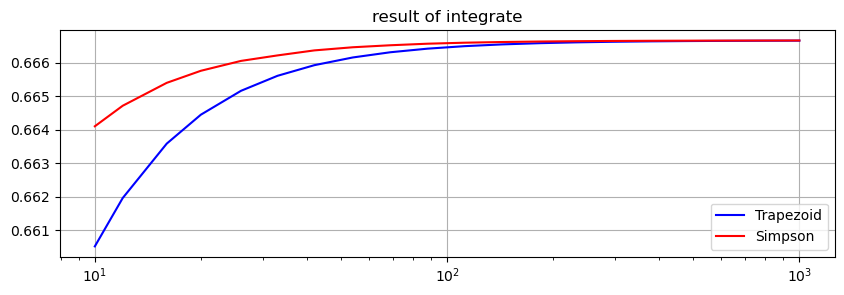

In [137]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.title('result of integrate')
plt.xscale("log")
plt.plot(nn,st,'b', label="Trapezoid")
plt.plot(nn,ss,'r', label="Simpson")
plt.legend()
plt.grid()